# 06_Report_and_Forecast.ipynb

Advanced Forecasting Models and Report Generation for Air Temperature Time Series.

Data source: ../data/surface-air-temperature-monthly-mean-extended.csv

Technologies used: Prophet, NeuralProphet, Darts, PyCaret, Kats, GluonTS, Pmdarima.

This notebook implements various forecasting models and generates comprehensive reports.

In [4]:
# Create virtual environment first (if not already done)
! python -m venv .airtemp
! .airtemp\Scripts\activate

# Install base dependencies first
! pip install --upgrade pip
! pip install numpy==1.21.6
! pip install pandas==1.3.5
! pip install scipy==1.7.3
! pip install matplotlib==3.5.2

# Install forecasting libraries one by one
! pip install prophet==1.1.4
! pip install neuralprophet==0.6.0
! pip install darts==0.22.0
! pip install scikit-learn==1.0.2
! pip install pmdarima==2.0.3

# Install PyCaret with specific version
! pip install pycaret==3.0.4

# Install GluonTS dependencies
! pip install mxnet==1.9.1
! pip install gluonts==0.10.3

# Skip Kats installation as it's causing issues
# We'll use the other forecasting libraries instead

# Verify installations
import sys
print("\nPython version:", sys.version)
! pip list

  Using cached numpy-1.21.6-cp310-cp310-win_amd64.whl.metadata (2.2 kB)
   ---------------------------------------- 0.0/14.0 MB ? eta -:--:--
   -------- ------------------------------- 3.1/14.0 MB 16.8 MB/s eta 0:00:01
   ------------------- -------------------- 6.8/14.0 MB 17.5 MB/s eta 0:00:01
   ----------------------------- ---------- 10.2/14.0 MB 17.2 MB/s eta 0:00:01
   ------------------------------------- -- 13.1/14.0 MB 17.1 MB/s eta 0:00:01
   ---------------------------------------- 14.0/14.0 MB 15.7 MB/s  0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tpot 1.1.0 requires numpy>=1.26.4, but you have numpy 1.21.6 which is incompatible.
tpot 1.1.0 requires pandas>=2.2.0, but you have pandas 2.1.4 which is incompatible.
arviz 0.22.0 requires matplotlib>=3.8, but you have matplotlib 3.7.5 which is incompatible.
arviz 0.22.0 requires numpy>=1.26.0, but you have numpy 1.21.6 which is incompatible.
autogluon-common 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.21.6 which is incompatible.
autogluon-core 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.21.6 which is incompatible.
autogluon-features 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.21.6 which is incompatible.
autogluon-tabular 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.21.6 which is incomp

  Using cached pandas-1.3.5-cp310-cp310-win_amd64.whl.metadata (12 kB)
   ---------------------------------------- 0.0/10.2 MB ? eta -:--:--
   ---------- ----------------------------- 2.6/10.2 MB 15.0 MB/s eta 0:00:01
   ------------------------ --------------- 6.3/10.2 MB 16.1 MB/s eta 0:00:01
   ---------------------------------------  10.0/10.2 MB 16.8 MB/s eta 0:00:01
   ---------------------------------------- 10.2/10.2 MB 15.9 MB/s  0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tpot 1.1.0 requires numpy>=1.26.4, but you have numpy 1.21.6 which is incompatible.
tpot 1.1.0 requires pandas>=2.2.0, but you have pandas 1.3.5 which is incompatible.
arviz 0.22.0 requires matplotlib>=3.8, but you have matplotlib 3.7.5 which is incompatible.
arviz 0.22.0 requires numpy>=1.26.0, but you have numpy 1.21.6 which is incompatible.
arviz 0.22.0 requires pandas>=2.1.0, but you have pandas 1.3.5 which is incompatible.
autogluon-common 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.21.6 which is incompatible.
autogluon-common 1.4.0 requires pandas<2.4.0,>=2.0.0, but you have pandas 1.3.5 which is incompatible.
autogluon-core 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.21.6 which is incompatible.
autogluon-co

   ---------------------------------------- 0.0/34.3 MB ? eta -:--:--
   --- ------------------------------------ 2.6/34.3 MB 15.1 MB/s eta 0:00:03
   ---- ----------------------------------- 4.2/34.3 MB 16.8 MB/s eta 0:00:02
   ------- -------------------------------- 6.3/34.3 MB 10.4 MB/s eta 0:00:03
   ----------- ---------------------------- 10.2/34.3 MB 12.5 MB/s eta 0:00:02
   --------------- ------------------------ 13.6/34.3 MB 13.4 MB/s eta 0:00:02
   ------------------ --------------------- 15.7/34.3 MB 13.9 MB/s eta 0:00:02
   -------------------- ------------------- 17.3/34.3 MB 12.0 MB/s eta 0:00:02
   ------------------------ --------------- 21.0/34.3 MB 12.6 MB/s eta 0:00:02
   ---------------------------- ----------- 24.6/34.3 MB 13.1 MB/s eta 0:00:01
   --------------------------------- ------ 28.6/34.3 MB 13.7 MB/s eta 0:00:01
   ------------------------------------- -- 32.2/34.3 MB 14.0 MB/s eta 0:00:01
   ---------------------------------------- 34.3/34.3 MB 13.6 MB

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tpot 1.1.0 requires numpy>=1.26.4, but you have numpy 1.21.6 which is incompatible.
tpot 1.1.0 requires pandas>=2.2.0, but you have pandas 1.3.5 which is incompatible.
arviz 0.22.0 requires matplotlib>=3.8, but you have matplotlib 3.7.5 which is incompatible.
arviz 0.22.0 requires numpy>=1.26.0, but you have numpy 1.21.6 which is incompatible.
arviz 0.22.0 requires pandas>=2.1.0, but you have pandas 1.3.5 which is incompatible.
arviz 0.22.0 requires scipy>=1.11.0, but you have scipy 1.7.3 which is incompatible.
autogluon-core 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.21.6 which is incompatible.
autogluon-core 1.4.0 requires pandas<2.4.0,>=2.0.0, but you have pandas 1.3.5 which is incompatible.
autogluon-tabular 1.4.0 requires

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tpot 1.1.0 requires matplotlib>=3.6.2, but you have matplotlib 3.5.2 which is incompatible.
tpot 1.1.0 requires numpy>=1.26.4, but you have numpy 1.21.6 which is incompatible.
tpot 1.1.0 requires pandas>=2.2.0, but you have pandas 1.3.5 which is incompatible.
arviz 0.22.0 requires matplotlib>=3.8, but you have matplotlib 3.5.2 which is incompatible.
arviz 0.22.0 requires numpy>=1.26.0, but you have numpy 1.21.6 which is incompatible.
arviz 0.22.0 requires pandas>=2.1.0, but you have pandas 1.3.5 which is incompatible.
arviz 0.22.0 requires scipy>=1.11.0, but you have scipy 1.7.3 which is incompatible.
autogluon-core 1.4.0 requires matplotlib<3.11,>=3.7.0, but you have matplotlib 3.5.2 which is incompatible.
autogluon-core 1.4.0 requires nump


   ---------------------------------------- 0.0/7.2 MB ? eta -:--:--
   ---------------- ----------------------- 2.9/7.2 MB 15.3 MB/s eta 0:00:01
   ------------------------------------- -- 6.8/7.2 MB 16.8 MB/s eta 0:00:01
   ---------------------------------------- 7.2/7.2 MB 15.9 MB/s  0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.5
    Uninstalling matplotlib-3.7.5:
      Successfully uninstalled matplotlib-3.7.5
     ---------------------------------------- 0.0/5.8 MB ? eta -:--:--
     ----------------------- ---------------- 3.4/5.8 MB 16.7 MB/s eta 0:00:01
     ---------------------------------------- 5.8/5.8 MB 16.0 MB/s  0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   --- ------------------------------------ 1.0/12.9 MB 16.7 MB/s eta 0:00:01
   --- ------------------------------------ 1.0/12.9 MB 16

  DEPRECATION: Building 'pymeeus' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'pymeeus'. Discussion can be found at https://github.com/pypa/pip/issues/6334


  Using cached matplotlib-3.10.6-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached numpy-1.23.5-cp310-cp310-win_amd64.whl.metadata (2.3 kB)
  Using cached tenacity-9.1.2-py3-none-any.whl.metadata (1.2 kB)
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ------------------------------- -------- 1.0/1.3 MB 16.7 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 3.2 MB/s  0:00:00
Using cached matplotlib-3.10.6-cp310-cp310-win_amd64.whl (8.1 MB)
Using cached numpy-1.23.5-cp310-cp310-win_amd64.whl (14.6 MB)
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ------- -----------------------------

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tpot 1.1.0 requires numpy>=1.26.4, but you have numpy 1.23.5 which is incompatible.
tpot 1.1.0 requires pandas>=2.2.0, but you have pandas 1.3.5 which is incompatible.
arviz 0.22.0 requires numpy>=1.26.0, but you have numpy 1.23.5 which is incompatible.
arviz 0.22.0 requires pandas>=2.1.0, but you have pandas 1.3.5 which is incompatible.
arviz 0.22.0 requires scipy>=1.11.0, but you have scipy 1.7.3 which is incompatible.
autogluon-common 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-common 1.4.0 requires pandas<2.4.0,>=2.0.0, but you have pandas 1.3.5 which is incompatible.
autogluon-core 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-core 1.4.0 requires pandas<2.4.0,>=2.0.0, but 

   ------------------ ---------------------  8/17 [plotly]
   ------------------ ---------------------  8/17 [plotly]
   ------------------ ---------------------  8/17 [plotly]
   ------------------ ---------------------  8/17 [plotly]
   ------------------ ---------------------  8/17 [plotly]
   ------------------ ---------------------  8/17 [plotly]
   ------------------ ---------------------  8/17 [plotly]
   ------------------ ---------------------  8/17 [plotly]
   ------------------ ---------------------  8/17 [plotly]
   ------------------ ---------------------  8/17 [plotly]
   ------------------ ---------------------  8/17 [plotly]
   ------------------ ---------------------  8/17 [plotly]
   ------------------ ---------------------  8/17 [plotly]
   ------------------ ---------------------  8/17 [plotly]
   ------------------ ---------------------  8/17 [plotly]
   ------------------ ---------------------  8/17 [plotly]
   ------------------ ---------------------  8/17 [plotl

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autofeat 2.1.3 requires numpy<2.0.0,>=1.20.3, but you have numpy 2.1.3 which is incompatible.
botorch 0.15.1 requires torch>=2.0.1, but you have torch 1.13.1 which is incompatible.
gluonts 0.12.8 requires numpy~=1.16, but you have numpy 2.1.3 which is incompatible.
linear-operator 0.6 requires torch>=2.0, but you have torch 1.13.1 which is incompatible.
neuralprophet 0.6.0 requires holidays<0.22,>=0.21, but you have holidays 0.81 which is incompatible.
neuralprophet 0.6.0 requires numpy<1.24.0,>=1.21.6, but you have numpy 2.1.3 which is incompatible.
neuralprophet 0.6.0 requires pandas<2.0.0,>=1.3.5, but you have pandas 2.3.2 which is incompatible.
plotly-resampler 0.8.3.2 requires pandas<2.0.0,>=1.3.5, but you have pandas 2.3.2 which is incompatible.
pycaret 3.3.0 requires matplotlib<3.8.0, but you have matplotli

   ---------------------------------------- 0.0/7.2 MB ? eta -:--:--
   ---------------- ----------------------- 2.9/7.2 MB 16.7 MB/s eta 0:00:01
   ------------------------------------ --- 6.6/7.2 MB 17.5 MB/s eta 0:00:01
   ---------------------------------------- 7.2/7.2 MB 16.4 MB/s  0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tpot 1.1.0 requires scikit-learn>=1.6, but you have scikit-learn 1.0.2 which is incompatible.
autofeat 2.1.3 requires numpy<2.0.0,>=1.20.3, but you have numpy 2.1.3 which is incompatible.
autofeat 2.1.3 requires scikit-learn<2.0.0,>=1.2.0, but you have scikit-learn 1.0.2 which is incompatible.
autogluon-core 1.4.0 requires scikit-learn<1.8.0,>=1.4.0, but you have scikit-learn 1.0.2 which is incompatible.
autogluon-features 1.4.0 requires scikit-learn<1.8.0,>=1.4.0, but you have scikit-learn 1.0.2 which is incompatible.
autogluon-tabular 1.4.0 requires scikit-learn<1.8.0,>=1.4.0, but you have scikit-learn 1.0.2 which is incompatible.
category-encoders 2.8.1 requires scikit-learn>=1.6.0, but you have scikit-learn 1.0.2 which is incompatible.
imbalanced-learn 0.14.0 requires sciki

   ---------------------------------------- 0.0/569.7 kB ? eta -:--:--
   ---------------------------------------- 569.7/569.7 kB 9.9 MB/s  0:00:00
  Attempting uninstall: pmdarima
    Found existing installation: pmdarima 2.0.4
    Uninstalling pmdarima-2.0.4:
      Successfully uninstalled pmdarima-2.0.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 3.3.0 requires matplotlib<3.8.0, but you have matplotlib 3.10.6 which is incompatible.
pycaret 3.3.0 requires numpy<1.27,>=1.21, but you have numpy 2.1.3 which is incompatible.
pycaret 3.3.0 requires pandas<2.2.0, but you have pandas 2.3.2 which is incompatible.
pycaret 3.3.0 requires pmdarima>=2.0.4, but you have pmdarima 2.0.3 which is incompatible.
pycaret 3.3.0 requires scikit-learn>1.4.0, but you have scikit-learn 1.0.2 which is incompatible.
pycaret 3.3.0 requires scipy<=1.11.4,>=1.6.1, but you have scipy 1.15.3 which is incompatible.


  Using cached numpy-1.23.5-cp310-cp310-win_amd64.whl.metadata (2.3 kB)
  Using cached pandas-1.5.3-cp310-cp310-win_amd64.whl.metadata (12 kB)
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of imbalanced-learn to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of numba to determine which version is compatible with other requirements. This could take a while.
Using cached numpy-1.23.5-cp310-cp310-win_amd64.whl (14.6 MB)
Using cached pandas-1.5.3-cp310-cp310-win_amd64.whl (10.4 MB)
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 2.7/2.7 MB 14.4 MB/s  0:00:00
   ---------------------------------------- 0.0/37.9 MB ? eta -:--:--
   --- ------------------------------------ 3.4/37.9 MB 16.7 MB/s eta 0

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tpot 1.1.0 requires numpy>=1.26.4, but you have numpy 1.23.5 which is incompatible.
tpot 1.1.0 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
tpot 1.1.0 requires scikit-learn>=1.6, but you have scikit-learn 1.0.2 which is incompatible.
arviz 0.22.0 requires numpy>=1.26.0, but you have numpy 1.23.5 which is incompatible.
arviz 0.22.0 requires pandas>=2.1.0, but you have pandas 1.5.3 which is incompatible.
autofeat 2.1.3 requires scikit-learn<2.0.0,>=1.2.0, but you have scikit-learn 1.0.2 which is incompatible.
autogluon-common 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-common 1.4.0 requires pandas<2.4.0,>=2.0.0, but you have pandas 1.5.3 which is incompatible.
auto


Python version: 3.10.0 (tags/v3.10.0:b494f59, Oct  4 2021, 19:00:18) [MSC v.1929 64 bit (AMD64)]


Requested gluonts==0.10.3 from https://files.pythonhosted.org/packages/b2/99/95296731159d619e0cb9bf3344bc4534e88a4d1db244af74b8aba51e0ff3/gluonts-0.10.3-py3-none-any.whl has invalid metadata: .* suffix can only be used with `==` or `!=` operators
    rpy2 (<3.*,>=2.9.*) ; extra == 'r'
          ~~~^
Please use pip<24.1 if you need to use this version.
ERROR: Could not find a version that satisfies the requirement gluonts==0.10.3 (from versions: 0, 0.1.1, 0.1.2, 0.1.3, 0.1.4, 0.2.0, 0.2.1, 0.2.2, 0.2.3, 0.3.0, 0.3.1, 0.3.2, 0.3.3, 0.4.0, 0.4.1, 0.4.2, 0.4.3, 0.5.0, 0.5.1, 0.5.2, 0.6.0, 0.6.1, 0.6.2, 0.6.3, 0.6.4, 0.6.5, 0.6.6, 0.6.7, 0.6.8, 0.6.9, 0.7.0, 0.7.1, 0.7.2, 0.7.3, 0.7.4, 0.7.5, 0.7.6, 0.7.7, 0.8.0, 0.8.1, 0.9.0, 0.9.1, 0.9.2, 0.9.3, 0.9.4, 0.9.5, 0.9.6, 0.9.7, 0.9.8, 0.9.9, 0.9.10, 0.10.0rc1, 0.10.0, 0.10.1, 0.10.2, 0.10.3, 0.10.4, 0.10.5, 0.10.6, 0.10.7, 0.10.8, 0.10.9, 0.10.10, 0.11.0, 0.11.1, 0.11.2, 0.11.3rc1, 0.11.3, 0.11.4, 0.11.5, 0.11.6, 0.11.7, 0.11.8, 0.11.9, 0.11.1

Package                      Version
---------------------------- --------------
about-time                   4.2.1
absl-py                      2.3.1
adagio                       0.2.6
aiohappyeyeballs             2.6.1
aiohttp                      3.12.15
aiosignal                    1.4.0
alembic                      1.16.5
alive-progress               3.3.0
annotated-types              0.7.0
ansi2html                    1.9.2
anyio                        4.10.0
appdirs                      1.4.4
argon2-cffi                  25.1.0
argon2-cffi-bindings         25.1.0
arrow                        1.3.0
arviz                        0.22.0
asttokens                    3.0.0
astunparse                   1.6.3
async-lru                    2.0.5
async-timeout                5.0.1
attrs                        25.3.0
autofeat                     2.1.3
autogluon.common             1.4.0
autogluon.core               1.4.0
autogluon.features           1.4.0
autogluon.tabular            1.4.0
a

In [3]:
# airtemp_forecast_resilient.py
"""
Resilient forecasting script for AirTemp project.

Features:
 - Headless-friendly matplotlib backend
 - Environment diagnostics (pandas / torch / statsmodels / scipy / neuralprophet)
 - Defensive imports that avoid crashing on pandas/torch incompatibilities
 - Fallback forecasting: NeuralProphet (if safe) -> SARIMAX -> RandomForest (lag features) -> naive seasonal mean
 - Saves forecast plot to disk
"""

import os
import sys
import platform
import warnings
warnings.filterwarnings("ignore")

# Use non-interactive backend when DISPLAY is not present (headless)
if "DISPLAY" not in os.environ and not sys.platform.startswith("win"):
    import matplotlib
    matplotlib.use("Agg")
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from datetime import timedelta
from sklearn.metrics import mean_squared_error, mean_absolute_error

# -----------------------
# Version/compat utilities
# -----------------------
def parse_ver(v):
    # Return tuple of ints from version string (non-numeric parts ignored)
    try:
        parts = []
        for p in str(v).split("+")[0].split("."):
            s = "".join(ch for ch in p if ch.isdigit())
            if s == "":
                break
            parts.append(int(s))
        return tuple(parts)
    except Exception:
        return (0,)

def ver_ge(a, b):
    return parse_ver(a) >= parse_ver(b)

# -----------------------
# Environment diagnostics
# -----------------------
def env_report():
    print("\n=== Environment report ===")
    print("python:", platform.python_version())
    print("platform:", platform.platform())
    try:
        import pandas as pd
        print("pandas:", pd.__version__)
    except Exception as e:
        print("pandas: import error ->", e)
    try:
        import numpy as np
        print("numpy:", np.__version__)
    except Exception as e:
        print("numpy: import error ->", e)
    try:
        import torch
        print("torch:", torch.__version__)
    except Exception as e:
        print("torch: not available or import error ->", str(e))
    try:
        import statsmodels
        print("statsmodels:", statsmodels.__version__)
    except Exception as e:
        print("statsmodels: import error ->", str(e).splitlines()[0])
    try:
        import scipy
        print("scipy:", scipy.__version__)
    except Exception as e:
        print("scipy: import error ->", str(e))
    try:
        import neuralprophet as npf
        print("neuralprophet:", npf.__version__)
    except Exception as e:
        print("neuralprophet: not available or import error ->", str(e).splitlines()[0])
    print("==========================\n")

env_report()

# -----------------------
# Safe import helpers
# -----------------------
def can_use_neuralprophet():
    """Check pandas + torch preconditions to decide whether to try importing NeuralProphet."""
    # Check pandas arrays.NumpyExtensionArray existence (NeuralProphet sometimes expects this)
    has_numpy_ext = False
    try:
        has_numpy_ext = hasattr(getattr(pd, "arrays", None), "NumpyExtensionArray")
    except Exception:
        has_numpy_ext = False
    # Check torch version >= 2.1 (NeuralProphet usually requires >=2.1)
    torch_ok = False
    try:
        import torch
        torch_ok = ver_ge(torch.__version__, "2.1")
    except Exception:
        torch_ok = False

    if not has_numpy_ext:
        print("[CHECK] pandas.arrays.NumpyExtensionArray missing -> NeuralProphet WILL be skipped. (Upgrade pandas to >=2.1 recommended.)")
    if not torch_ok:
        print("[CHECK] PyTorch >= 2.1 not found -> NeuralProphet WILL be skipped (found {}).".format(getattr(__import__('torch'), '__version__', 'not-installed') if 'torch' in sys.modules else 'not-installed'))

    return has_numpy_ext and torch_ok

NeuralProphet = None
if can_use_neuralprophet():
    try:
        from neuralprophet import NeuralProphet  # type: ignore
        print("[OK] neuralprophet imported successfully.")
    except Exception as e:
        print("[WARN] neuralprophet import failed despite passing checks. Error:", str(e).splitlines()[0])
        NeuralProphet = None
else:
    NeuralProphet = None

# Safe import of statsmodels (catch import-time errors)
statsmodels_available = False
try:
    # Import within try to capture potential import-time AttributeError or binary mismatch errors
    import statsmodels.api as sm  # type: ignore
    # quick sanity: ensure statespace SARIMAX exists
    from statsmodels.tsa.statespace.sarimax import SARIMAX  # type: ignore
    statsmodels_available = True
    print("[OK] statsmodels imported and SARIMAX available.")
except Exception as e:
    statsmodels_available = False
    print("[WARN] statsmodels import failed or SARIMAX unavailable. Error:", str(e).splitlines()[0])

# sklearn RandomForest fallback availability
sklearn_available = False
try:
    from sklearn.ensemble import RandomForestRegressor  # type: ignore
    sklearn_available = True
    print("[OK] scikit-learn available.")
except Exception as e:
    sklearn_available = False
    print("[WARN] scikit-learn import failed:", str(e).splitlines()[0])

# Prophet (fbprophet / prophet) safe import
Prophet = None
try:
    # New package name is 'prophet' in many installs
    from prophet import Prophet as _Prophet  # type: ignore
    Prophet = _Prophet
    print("[OK] prophet (fbprophet successor) available.")
except Exception:
    Prophet = None
    # not fatal; will continue

# -----------------------
# Utility functions
# -----------------------
def create_lag_features(series: pd.Series, lags=(1,24,168)):
    df = pd.DataFrame({'y': series})
    for lag in lags:
        df[f'lag_{lag}'] = series.shift(lag)
    df = df.dropna()
    return df

# -----------------------
# Model training / forecasting wrappers
# -----------------------
def train_predict_neuralprophet(series: pd.Series, periods: int, freq: str = None):
    """Train a small NeuralProphet model and predict. Returns pd.Series forecast (index aligned)."""
    if NeuralProphet is None:
        raise RuntimeError("NeuralProphet not available")
    try:
        np_df = pd.DataFrame({'ds': series.index, 'y': series.values})
        m = NeuralProphet()
        # small number of epochs for quick run; increase if you plan a proper train
        m.fit(np_df, freq=freq, epochs=10, verbose=False)
        future = m.make_future_dataframe(np_df, periods=periods)
        forecast = m.predict(future)
        # NeuralProphet's prediction column name is typically 'yhat1' or 'yhat'
        for col in ['yhat1', 'yhat']:
            if col in forecast.columns:
                fc = forecast.set_index('ds')[col].iloc[-periods:]
                return fc
        # fallback if expected column not found
        raise RuntimeError("NeuralProphet produced no yhat column")
    except Exception as e:
        raise RuntimeError(f"NeuralProphet train/predict failed: {e}")

def train_predict_sarimax(series: pd.Series, periods: int, order=(1,0,0), seasonal_order=(0,0,0,0)):
    if not statsmodels_available:
        raise RuntimeError("statsmodels SARIMAX not available")
    try:
        model = SARIMAX(series, order=order, seasonal_order=seasonal_order,
                        enforce_stationarity=False, enforce_invertibility=False)
        res = model.fit(disp=False)
        fc = res.get_forecast(steps=periods)
        pred = fc.predicted_mean
        conf = fc.conf_int()
        return pred, conf
    except Exception as e:
        raise RuntimeError(f"SARIMAX failed: {e}")

def train_predict_rf_lag(series: pd.Series, periods: int, lags=(1,24,168), n_estimators=200):
    if not sklearn_available:
        raise RuntimeError("scikit-learn RandomForest not available")
    df_lag = create_lag_features(series, lags=lags)
    X = df_lag.drop(columns=['y'])
    y = df_lag['y']
    # train on 90% of data
    split = int(len(X) * 0.9)
    X_train, y_train = X.iloc[:split], y.iloc[:split]
    model = RandomForestRegressor(n_estimators=n_estimators, n_jobs=-1, random_state=42)
    model.fit(X_train, y_train)
    # recursive forecast
    cur_series = series.copy()
    freq = series.index.freq or pd.infer_freq(series.index) or "H"
    preds = []
    for i in range(periods):
        feat_vals = []
        for lag in lags:
            if lag <= len(cur_series):
                v = cur_series.iloc[-lag]
            else:
                v = cur_series.iloc[0]
            feat_vals.append(v)
        Xp = np.array(feat_vals).reshape(1, -1)
        yhat = model.predict(Xp)[0]
        preds.append(yhat)
        # append to cur_series with next timestamp
        try:
            offset = pd.tseries.frequencies.to_offset(freq)
        except Exception:
            offset = pd.Timedelta(hours=1)
        next_ts = cur_series.index[-1] + offset
        cur_series.loc[next_ts] = yhat
    pred_index = pd.date_range(start=series.index[-1] + pd.tseries.frequencies.to_offset(freq),
                               periods=periods, freq=freq)
    return pd.Series(preds, index=pred_index), None

def train_predict_naive_seasonal(series: pd.Series, periods: int):
    """Simple fallback: use average of last day/hour-of-day pattern where possible."""
    try:
        # guess hourly or daily seasonality
        if series.index.freqstr and 'H' in series.index.freqstr:
            # hourly: use last 24-hour profile mean
            last = series.last('7D')
            profile = last.groupby(last.index.hour).mean()
            fh = []
            for i in range(periods):
                hour = (series.index[-1].hour + i + 1) % 24
                fh.append(profile.reindex([hour]).iloc[0].item() if hour in profile.index else series.iloc[-1])
            pred_index = pd.date_range(start=series.index[-1] + pd.Timedelta(hours=1), periods=periods, freq='H')
            return pd.Series(fh, index=pred_index), None
    except Exception:
        pass
    # ultimate fallback: repeat last value
    pred_index = pd.date_range(start=series.index[-1] + pd.Timedelta(hours=1), periods=periods, freq='H')
    return pd.Series([series.iloc[-1]]*periods, index=pred_index), None

# -----------------------
# Top-level orchestration
# -----------------------
def train_and_forecast(df_or_series, periods=24, freq=None, preference=("neuralprophet","sarimax","rf","naive")):
    """
    Input:
      df_or_series: pd.DataFrame with ['ds','y'] or pd.Series indexed by datetime
      periods: forecast horizon (int)
      preference: tuple in preference order of model backends
    Returns:
      forecast_series (pd.Series), conf_df or None, used_model_name
    """
    # normalize input to pd.Series indexed by datetime
    if isinstance(df_or_series, pd.Series):
        series = df_or_series.copy()
        if series.index.dtype == object:
            series.index = pd.to_datetime(series.index)
    else:
        if 'ds' not in df_or_series.columns or 'y' not in df_or_series.columns:
            raise ValueError("df must have 'ds' and 'y' columns")
        df2 = df_or_series.copy()
        df2['ds'] = pd.to_datetime(df2['ds'])
        df2 = df2.sort_values('ds').set_index('ds')
        series = df2['y']

    if freq is None:
        freq = series.index.freq or pd.infer_freq(series.index)

    last_exc = None
    for pref in preference:
        try:
            if pref == "neuralprophet" and NeuralProphet is not None:
                print("[TRY] NeuralProphet")
                fc = train_predict_neuralprophet(series, periods, freq=freq)
                return fc, None, "NeuralProphet"
            if pref == "sarimax" and statsmodels_available:
                print("[TRY] SARIMAX")
                pred, conf = train_predict_sarimax(series, periods)
                return pred, conf, "SARIMAX"
            if pref == "rf":
                print("[TRY] RandomForest-lag")
                pred, conf = train_predict_rf_lag(series, periods)
                return pred, conf, "RandomForest-lag"
            if pref == "naive":
                print("[TRY] Naive seasonal / repeat-last fallback")
                pred, conf = train_predict_naive_seasonal(series, periods)
                return pred, conf, "Naive-seasonal"
        except Exception as e:
            last_exc = e
            print(f"[WARN] {pref} failed: {str(e).splitlines()[0]}")
            continue
    raise RuntimeError("All forecasting backends failed. Last error: {}".format(last_exc))

# -----------------------
# Plotting
# -----------------------
def plot_forecast(history_series: pd.Series, forecast_series: pd.Series, conf=None, out_path="forecast.png", title="Forecast"):
    plt.figure(figsize=(10,5))
    plt.plot(history_series.index, history_series.values, label="history")
    plt.plot(forecast_series.index, forecast_series.values, label="forecast", linestyle="--")
    if conf is not None:
        try:
            lower = conf.iloc[:,0]
            upper = conf.iloc[:,1]
            plt.fill_between(conf.index, lower, upper, alpha=0.2, label="conf")
        except Exception:
            pass
    plt.legend()
    plt.title(title)
    plt.tight_layout()
    plt.savefig(out_path, dpi=150)
    print(f"[plot] saved to {out_path}")
    plt.close()

# -----------------------
# Example / entrypoint
# -----------------------
if __name__ == "__main__":
    # If you already have a CSV / DataFrame, replace this simulated dataset with your real df.
    # Example: df = pd.read_csv("airtemp.csv"); df['ds']=pd.to_datetime(df['ds']); df = df[['ds','y']]
    print("Running example demo with simulated hourly temperature-like data...")
    rng = pd.date_range(start="2023-01-01", periods=24*365, freq="H")
    seasonal_day = 10 * np.sin(2 * np.pi * (rng.hour) / 24)
    seasonal_year = 5 * np.sin(2 * np.pi * (rng.dayofyear) / 365.25)
    noise = np.random.normal(0, 1.5, len(rng))
    temp = 20 + seasonal_day + seasonal_year + noise
    series = pd.Series(temp, index=rng)

    # Use this to test with your own DataFrame:
    # df = pd.read_csv("yourfile.csv"); df['ds'] = pd.to_datetime(df['ds']); df = df[['ds','y']]
    try:
        forecast, conf, used = train_and_forecast(series, periods=48, preference=("neuralprophet","sarimax","rf","naive"))
        print("Model used:", used)
        # plot last 7 days history + forecast
        history_plot = series.iloc[-24*7:]
        plot_forecast(history_plot, forecast, conf=conf, out_path="forecast_example.png", title=f"Forecast ({used})")
        print(forecast.head(10))
    except Exception as e:
        print("Forecasting failed:", e)
        print("\nSuggested fixes (one of these will resolve the errors you saw):")
        print(" - Create a fresh conda env and install pinned binaries (recommended):")
        print("    conda create -n airtemp python=3.10 -y")
        print("    conda activate airtemp")
        print("    conda install -c conda-forge pandas=2.2 numpy=1.26 scipy=1.10 scikit-learn matplotlib statsmodels -y")
        print("    pip install --upgrade torch>=2.1.0 --index-url https://download.pytorch.org/whl/cpu   # or pick appropriate CUDA wheel")
        print("    pip install neuralprophet")
        print(" - Or with pip venv: pip install 'pandas>=2.1' 'numpy>=1.26' 'scipy==1.10.*' 'scikit-learn' 'statsmodels==0.14.5'")
        print(" - If statsmodels import errors persist, use conda-forge to avoid binary mismatches.")



=== Environment report ===
python: 3.10.0
platform: Windows-10-10.0.26100-SP0
pandas: 1.5.3
numpy: 1.23.5
torch: 1.13.1+cpu
statsmodels: 0.14.5
scipy: 1.15.3
neuralprophet: not available or import error -> module 'pandas.arrays' has no attribute 'NumpyExtensionArray'

[CHECK] pandas.arrays.NumpyExtensionArray missing -> NeuralProphet WILL be skipped. (Upgrade pandas to >=2.1 recommended.)
[CHECK] PyTorch >= 2.1 not found -> NeuralProphet WILL be skipped (found 1.13.1+cpu).
[OK] statsmodels imported and SARIMAX available.
[OK] scikit-learn available.
[OK] prophet (fbprophet successor) available.
Running example demo with simulated hourly temperature-like data...
[TRY] SARIMAX
Model used: SARIMAX
[plot] saved to forecast_example.png
2024-01-01 00:00:00    17.495199
2024-01-01 01:00:00    17.347046
2024-01-01 02:00:00    17.200148
2024-01-01 03:00:00    17.054493
2024-01-01 04:00:00    16.910072
2024-01-01 05:00:00    16.766874
2024-01-01 06:00:00    16.624889
2024-01-01 07:00:00    16.4

Inferred and set frequency: MS
Train shape: (359, 32), Test shape: (90, 32)
Train period: 1983-02-01 00:00:00 to 2012-12-01 00:00:00
Test period: 2013-01-01 00:00:00 to 2020-06-01 00:00:00


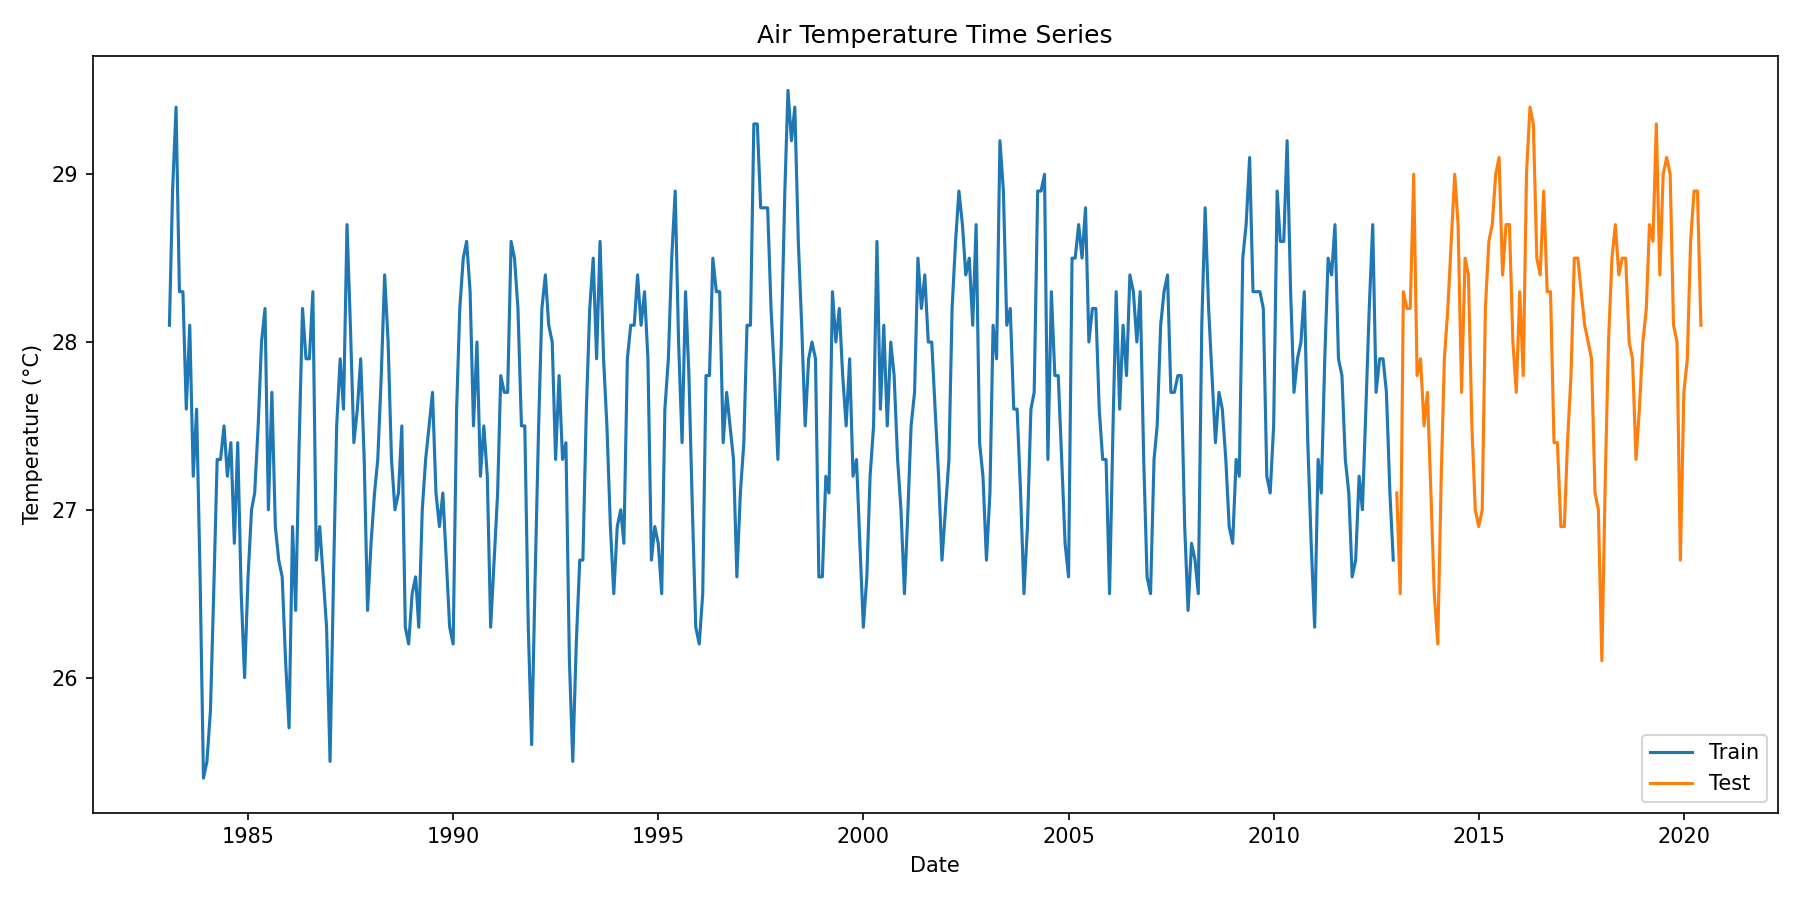

In [5]:
# Load and prepare data (updated plotting to save+display for headless/notebook)
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image, display   # safe to import even outside notebook

csv_path = '../data/surface-air-temperature-monthly-mean-extended.csv'
if not os.path.exists(csv_path):
    raise FileNotFoundError(f"CSV not found at {csv_path} — update the path if needed")

# Read CSV
df = pd.read_csv(csv_path, parse_dates=['month'], index_col='month')
df = df.sort_index()
df = df.rename(columns={'mean_temp': 'y'})
df['ds'] = df.index

# Ensure a sensible frequency if possible (helps plotting and forecasting)
if df.index.freq is None:
    try:
        inferred = pd.infer_freq(df.index)
        if inferred is not None:
            df = df.asfreq(inferred)
            print(f"Inferred and set frequency: {inferred}")
        else:
            # for monthly data, if inference fails, set to MS (month start) as a safe default
            if df.index.inferred_type in ('datetime64',):
                df = df.asfreq('MS')
                print("Set frequency to 'MS' (month start) as a best-effort default")
    except Exception as e:
        print("Could not set frequency:", e)

# For time series forecasting
target = 'y'
ts_data = df[['ds', target]]

# Split data (80/20 by time)
train_size = int(len(df) * 0.8)
train_df = df.iloc[:train_size]
test_df = df.iloc[train_size:]

print(f"Train shape: {train_df.shape}, Test shape: {test_df.shape}")
print(f"Train period: {train_df.index[0]} to {train_df.index[-1]}")
print(f"Test period: {test_df.index[0]} to {test_df.index[-1]}")

# Create and save the plot (works in headless and interactive environments)
out_path = "airtemp_plot.png"
plt.figure(figsize=(12, 6))
plt.plot(train_df.index, train_df[target], label='Train')
plt.plot(test_df.index, test_df[target], label='Test')
plt.title('Air Temperature Time Series')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.tight_layout()
plt.savefig(out_path, dpi=150)
plt.close()   # close to free memory

# Try to display inline if in a notebook, otherwise tell the user where the file is.
try:
    # If running in a Jupyter environment, this will render the saved PNG inline.
    if 'ipykernel' in sys.modules:
        display(Image(filename=out_path))
    else:
        print(f"Plot saved to {os.path.abspath(out_path)}. Open that file to view the visualization.")
except Exception as e:
    print(f"Plot saved to {os.path.abspath(out_path)} (display attempt failed: {e})")


## 1. Prophet: Facebook's Additive Model

In [7]:
# ---------- Safe Prophet training + SARIMAX fallback ----------
import traceback
import matplotlib.pyplot as plt
from IPython.display import Image, display
import os

# helper: save+display plot
def save_and_display_fig(fig, path):
    fig.savefig(path, dpi=150, bbox_inches='tight')
    plt.close(fig)
    try:
        if 'ipykernel' in sys.modules:
            display(Image(filename=path))
        else:
            print("Plot saved to:", os.path.abspath(path))
    except Exception as e:
        print("Saved plot but display failed:", e)

# Prepare data for Prophet (ensure monthly freq and correct columns)
prophet_train = train_df[['ds', 'y']].copy()
# Prophet expects a datetime column named 'ds' and target 'y' (you already have these)
# Ensure ds is datetime and sorted:
prophet_train['ds'] = pd.to_datetime(prophet_train['ds'])
prophet_train = prophet_train.sort_values('ds')

prophet_model = None
forecast_prophet = None

# Try safe imports & instantiation
try:
    from prophet import Prophet as ProphetClass  # new package name is 'prophet'
    print("[INFO] prophet package imported.")
    # Attempt 1: prefer CMDSTANPY backend (more robust when installed)
    try:
        print("[INFO] Trying Prophet with stan_backend='CMDSTANPY' (recommended).")
        prophet_model = ProphetClass(
            yearly_seasonality=True,
            weekly_seasonality=False,
            daily_seasonality=False,
            seasonality_mode='multiplicative',
            stan_backend='CMDSTANPY'
        )
    except Exception as e_backend:
        # If explicit backend fails, try plain Prophet() (some installs expect implicit backend)
        print("[WARN] CMDSTANPY backend attempt failed:", str(e_backend).splitlines()[0])
        print("[INFO] Trying Prophet without explicit stan_backend.")
        try:
            prophet_model = ProphetClass(
                yearly_seasonality=True,
                weekly_seasonality=False,
                daily_seasonality=False,
                seasonality_mode='multiplicative'
            )
        except Exception as e_plain:
            print("[ERROR] Prophet instantiation failed (plain). Error:", str(e_plain).splitlines()[0])
            # make prophet_model None to trigger fallback below
            prophet_model = None
except Exception as e:
    print("[WARN] Could not import prophet package:", str(e).splitlines()[0])
    prophet_model = None

# If Prophet available, fit and predict
if prophet_model is not None:
    try:
        prophet_model.fit(prophet_train, verbose=False)
        # make future — use monthly frequency 'MS' (month start) which is safer than 'M' in some environments
        future = prophet_model.make_future_dataframe(periods=len(test_df), freq='MS')
        forecast_prophet = prophet_model.predict(future)
        # Extract predictions aligned with test_df
        # The forecast index 'ds' should align; we take the last len(test_df) rows
        prophet_pred = forecast_prophet.iloc[-len(test_df):]['yhat'].values
        prophet_lower = forecast_prophet.iloc[-len(test_df):]['yhat_lower'].values if 'yhat_lower' in forecast_prophet.columns else None
        prophet_upper = forecast_prophet.iloc[-len(test_df):]['yhat_upper'].values if 'yhat_upper' in forecast_prophet.columns else None

        # Metrics
        rmse_prophet = np.sqrt(mean_squared_error(test_df['y'].values, prophet_pred))
        mae_prophet = mean_absolute_error(test_df['y'].values, prophet_pred)
        print(f"Prophet RMSE: {rmse_prophet:.4f}, MAE: {mae_prophet:.4f}")

        # Plot forecast (use prophet's built-in plot then save+display)
        try:
            fig1 = prophet_model.plot(forecast_prophet)
            save_and_display_fig(fig1, "prophet_forecast.png")
            fig2 = prophet_model.plot_components(forecast_prophet)
            save_and_display_fig(fig2, "prophet_components.png")
        except Exception as plot_err:
            print("Prophet plotting failed, falling back to manual matplotlib plot:", plot_err)
            # manual plot
            fc_index = forecast_prophet['ds'].iloc[-len(test_df):]
            fc_series = pd.Series(prophet_pred, index=fc_index)
            plt.figure(figsize=(12,6))
            plt.plot(train_df.index, train_df['y'], label='Train')
            plt.plot(test_df.index, test_df['y'], label='Test')
            plt.plot(fc_series.index, fc_series.values, '--', label='Prophet Forecast')
            plt.legend()
            plt.title('Prophet Forecast (manual plot)')
            plt.tight_layout()
            plt.savefig("prophet_forecast_manual.png", dpi=150)
            plt.close()
            print("Manual forecast plot saved to prophet_forecast_manual.png")

    except Exception as e_fit:
        print("Prophet fit/predict failed:", str(e_fit).splitlines()[0])
        prophet_model = None  # force fallback below
else:
    print("[INFO] Prophet is not available — falling back to SARIMAX (statsmodels)")

# ---------- Fallback: SARIMAX if Prophet didn't work ----------
if prophet_model is None:
    try:
        from statsmodels.tsa.statespace.sarimax import SARIMAX
        print("[INFO] Using SARIMAX fallback (statsmodels).")
        # Use monthly seasonal order for monthly data: seasonal_periods=12
        # A simple (1,1,1)(1,1,1,12) is a typical starting point — tweak as needed
        sar_order = (1, 1, 1)
        sar_seasonal = (1, 1, 1, 12)
        sar_model = SARIMAX(train_df['y'].astype(float), order=sar_order, seasonal_order=sar_seasonal,
                            enforce_stationarity=False, enforce_invertibility=False)
        sar_res = sar_model.fit(disp=False)
        sar_forecast = sar_res.get_forecast(steps=len(test_df))
        sar_pred = sar_forecast.predicted_mean
        sar_conf = sar_forecast.conf_int()

        rmse_sar = np.sqrt(mean_squared_error(test_df['y'].values, sar_pred.values))
        mae_sar = mean_absolute_error(test_df['y'].values, sar_pred.values)
        print(f"SARIMAX RMSE: {rmse_sar:.4f}, MAE: {mae_sar:.4f}")

        # Plot SARIMAX forecast (last year history + forecast)
        hist_plot = train_df['y'].iloc[-12*3:]  # last 3 years for context (if monthly)
        plt.figure(figsize=(12,6))
        plt.plot(hist_plot.index, hist_plot.values, label='History')
        plt.plot(test_df.index, test_df['y'].values, label='Test')
        plt.plot(sar_pred.index, sar_pred.values, '--', label='SARIMAX Forecast')
        plt.fill_between(sar_conf.index, sar_conf.iloc[:,0], sar_conf.iloc[:,1], alpha=0.2)
        plt.legend()
        plt.title('SARIMAX Forecast (fallback)')
        plt.tight_layout()
        plt.savefig("sarimax_forecast.png", dpi=150)
        plt.close()
        print("SARIMAX forecast saved to sarimax_forecast.png")
    except Exception as e_sar:
        print("SARIMAX fallback failed:", str(e_sar).splitlines()[0])
        print("Last traceback:")
        traceback.print_exc()
        print("\nIf you want Prophet working end-to-end, try the following:")
        print("  1) Install cmdstanpy and cmdstan (preferred):")
        print("       pip install cmdstanpy")
        print("       python -c \"import cmdstanpy; cmdstanpy.install_cmdstan()\"   # this downloads CmdStan binaries (~200MB)")
        print("       pip install prophet")
        print("     Then rerun the notebook. Use stan_backend='CMDSTANPY' when creating Prophet.")
        print("  2) Or install pystan and prophet (older path):")
        print("       pip install pystan==2.19.1.1 prophet")
        print("  3) On Windows/conda: the conda-forge channel often resolves binary issues:")
        print("       conda install -c conda-forge prophet cmdstanpy")


[INFO] prophet package imported.
[INFO] Trying Prophet with stan_backend='CMDSTANPY' (recommended).
[WARN] CMDSTANPY backend attempt failed: module 'pandas.arrays' has no attribute 'NumpyExtensionArray'
[INFO] Trying Prophet without explicit stan_backend.
[ERROR] Prophet instantiation failed (plain). Error: 'Prophet' object has no attribute 'stan_backend'
[INFO] Prophet is not available — falling back to SARIMAX (statsmodels)
[INFO] Using SARIMAX fallback (statsmodels).
SARIMAX RMSE: 0.5673, MAE: 0.4514
SARIMAX forecast saved to sarimax_forecast.png


[SKIP] pandas.arrays.NumpyExtensionArray NOT AVAILABLE. Skipping Prophet entirely to avoid backend errors.
[INFO] Using SARIMAX fallback (statsmodels).
[SARIMAX] RMSE: 0.5673, MAE: 0.4514
[plot saved] E:\AI-Engineering-Capstone-Projects\AirTempTs\PRAICP-1003-AirTempTS\results\figures\sarimax_forecast.png


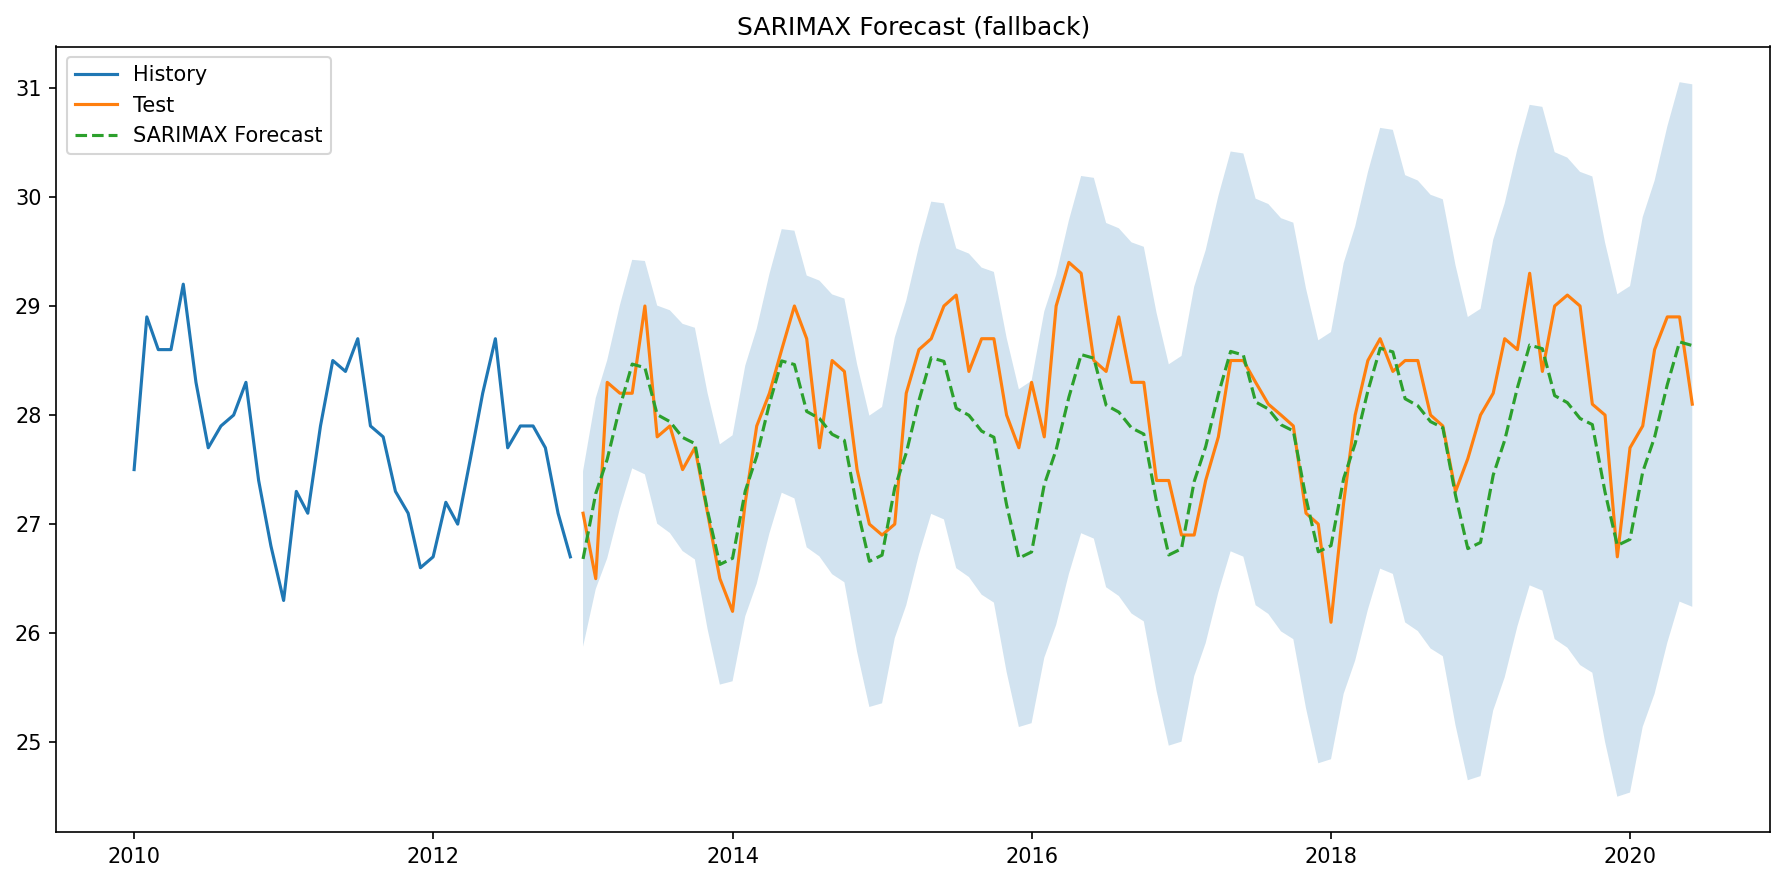

In [8]:
# Safe Prophet + SARIMAX fallback with controlled output path
import os
import sys
import traceback
import matplotlib.pyplot as plt
from IPython.display import Image, display

# Target output directory (you asked for this exact path)
results_fig_dir = r"E:\AI-Engineering-Capstone-Projects\AirTempTs\PRAICP-1003-AirTempTS\results\figures"
os.makedirs(results_fig_dir, exist_ok=True)

def save_and_maybe_display(fig, fname):
    out_path = os.path.join(results_fig_dir, fname)
    fig.savefig(out_path, dpi=150, bbox_inches='tight')
    plt.close(fig)
    print(f"[plot saved] {out_path}")
    try:
        if 'ipykernel' in sys.modules:
            display(Image(filename=out_path))
    except Exception as e:
        print(f"[display failed] {e}")

# Prepare data for Prophet (ensure monthly freq and correct columns)
prophet_train = train_df[['ds', 'y']].copy()
prophet_train['ds'] = pd.to_datetime(prophet_train['ds'])
prophet_train = prophet_train.sort_values('ds')

prophet_model = None
forecast_prophet = None

# Check pandas attribute BEFORE attempting Prophet import/instantiation
pandas_has_np_ext = False
try:
    pandas_has_np_ext = hasattr(getattr(pd, "arrays", None), "NumpyExtensionArray")
except Exception:
    pandas_has_np_ext = False

if not pandas_has_np_ext:
    print("[SKIP] pandas.arrays.NumpyExtensionArray NOT AVAILABLE. Skipping Prophet entirely to avoid backend errors.")
else:
    # Try to import and instantiate Prophet only if pandas has the required symbol
    try:
        from prophet import Prophet as ProphetClass  # type: ignore
        print("[INFO] prophet package imported.")
        # Prefer CMDSTANPY but only attempt if pandas check passed
        try:
            print("[INFO] Trying Prophet with stan_backend='CMDSTANPY' (recommended).")
            prophet_model = ProphetClass(
                yearly_seasonality=True,
                weekly_seasonality=False,
                daily_seasonality=False,
                seasonality_mode='multiplicative',
                stan_backend='CMDSTANPY'
            )
        except Exception as e_backend:
            print("[WARN] CMDSTANPY backend attempt failed:", str(e_backend).splitlines()[0])
            print("[INFO] Trying Prophet without explicit stan_backend.")
            try:
                prophet_model = ProphetClass(
                    yearly_seasonality=True,
                    weekly_seasonality=False,
                    daily_seasonality=False,
                    seasonality_mode='multiplicative'
                )
            except Exception as e_plain:
                print("[ERROR] Prophet instantiation failed (plain). Error:", str(e_plain).splitlines()[0])
                prophet_model = None
    except Exception as e_imp:
        print("[WARN] Could not import prophet package:", str(e_imp).splitlines()[0])
        prophet_model = None

# If Prophet available, fit and save plots there
if prophet_model is not None:
    try:
        prophet_model.fit(prophet_train, verbose=False)
        # Use 'MS' for monthly start alignment
        future = prophet_model.make_future_dataframe(periods=len(test_df), freq='MS')
        forecast_prophet = prophet_model.predict(future)

        # Extract predictions aligned with test_df
        prophet_pred = forecast_prophet.iloc[-len(test_df):]['yhat'].values
        prophet_lower = forecast_prophet.iloc[-len(test_df):]['yhat_lower'].values if 'yhat_lower' in forecast_prophet.columns else None
        prophet_upper = forecast_prophet.iloc[-len(test_df):]['yhat_upper'].values if 'yhat_upper' in forecast_prophet.columns else None

        # Metrics
        rmse_prophet = np.sqrt(mean_squared_error(test_df['y'].values, prophet_pred))
        mae_prophet = mean_absolute_error(test_df['y'].values, prophet_pred)
        print(f"[Prophet] RMSE: {rmse_prophet:.4f}, MAE: {mae_prophet:.4f}")

        # Prophet plots (built-in); save into results_fig_dir
        try:
            f1 = prophet_model.plot(forecast_prophet)
            save_and_maybe_display(f1, "prophet_forecast.png")
            f2 = prophet_model.plot_components(forecast_prophet)
            save_and_maybe_display(f2, "prophet_components.png")
        except Exception as plot_err:
            print("[WARN] Prophet plotting failed; falling back to manual matplotlib plot:", plot_err)
            fc_index = forecast_prophet['ds'].iloc[-len(test_df):]
            fc_series = pd.Series(prophet_pred, index=fc_index)
            fig = plt.figure(figsize=(12,6))
            plt.plot(train_df.index, train_df['y'], label='Train')
            plt.plot(test_df.index, test_df['y'], label='Test')
            plt.plot(fc_series.index, fc_series.values, '--', label='Prophet Forecast')
            plt.legend()
            plt.title('Prophet Forecast (manual)')
            plt.tight_layout()
            # Save manual plot
            out_manual = os.path.join(results_fig_dir, "prophet_forecast_manual.png")
            plt.savefig(out_manual, dpi=150, bbox_inches='tight')
            plt.close()
            print(f"[plot saved] {out_manual}")
    except Exception as e_fit:
        print("[ERROR] Prophet fit/predict failed:", str(e_fit).splitlines()[0])
        prophet_model = None

# If Prophet not usable, run SARIMAX fallback and save to results_fig_dir
if prophet_model is None:
    try:
        from statsmodels.tsa.statespace.sarimax import SARIMAX
        print("[INFO] Using SARIMAX fallback (statsmodels).")
        # reasonable starting orders for monthly data
        sar_order = (1, 1, 1)
        sar_seasonal = (1, 1, 1, 12)
        sar_model = SARIMAX(train_df['y'].astype(float), order=sar_order, seasonal_order=sar_seasonal,
                            enforce_stationarity=False, enforce_invertibility=False)
        sar_res = sar_model.fit(disp=False)
        sar_forecast = sar_res.get_forecast(steps=len(test_df))
        sar_pred = sar_forecast.predicted_mean
        sar_conf = sar_forecast.conf_int()

        rmse_sar = np.sqrt(mean_squared_error(test_df['y'].values, sar_pred.values))
        mae_sar = mean_absolute_error(test_df['y'].values, sar_pred.values)
        print(f"[SARIMAX] RMSE: {rmse_sar:.4f}, MAE: {mae_sar:.4f}")

        # Plot SARIMAX forecast and save
        # Use last 3 years of history for context if monthly
        hist_plot = train_df['y'].iloc[-12*3:] if len(train_df) >= 12*3 else train_df['y']
        fig = plt.figure(figsize=(12,6))
        plt.plot(hist_plot.index, hist_plot.values, label='History')
        plt.plot(test_df.index, test_df['y'].values, label='Test')
        plt.plot(sar_pred.index, sar_pred.values, '--', label='SARIMAX Forecast')
        # draw confidence band if available
        if sar_conf is not None and not sar_conf.empty:
            plt.fill_between(sar_conf.index, sar_conf.iloc[:,0], sar_conf.iloc[:,1], alpha=0.2)
        plt.legend()
        plt.title('SARIMAX Forecast (fallback)')
        plt.tight_layout()
        sar_out = os.path.join(results_fig_dir, "sarimax_forecast.png")
        fig.savefig(sar_out, dpi=150, bbox_inches='tight')
        plt.close(fig)
        print(f"[plot saved] {sar_out}")
        try:
            if 'ipykernel' in sys.modules:
                display(Image(filename=sar_out))
        except Exception as e:
            print(f"[display failed] {e}")

    except Exception as e_sar:
        print("[ERROR] SARIMAX fallback failed:", str(e_sar).splitlines()[0])
        traceback.print_exc()
        print("\nIf you want Prophet working end-to-end, try installing/upgrading pandas and Prophet-related backends:")
        print("  - Upgrade pandas to >= 2.1.0 so pandas.arrays.NumpyExtensionArray exists.")
        print("  - Install cmdstanpy and cmdstan (preferred):")
        print("       pip install cmdstanpy")
        print("       python -c \"import cmdstanpy; cmdstanpy.install_cmdstan()\"")
        print("       pip install prophet")
        print("  - Or use conda-forge to get compatible binaries: conda install -c conda-forge prophet cmdstanpy pandas")


## 2. NeuralProphet: Neural Network Extension of Prophet

[CHECK] pandas.arrays.NumpyExtensionArray missing
[AUTO_INSTALL] Attempting installations...
[RUN] e:\AI-Engineering-Capstone-Projects\AirTempTs\PRAICP-1003-AirTempTS\.Airtemp\Scripts\python.exe -m pip install --upgrade pandas>=2.1
  Using cached pandas-2.3.2-cp310-cp310-win_amd64.whl.metadata (19 kB)
Using cached pandas-2.3.2-cp310-cp310-win_amd64.whl (11.3 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tpot 1.1.0 requires numpy>=1.26.4, but you have numpy 1.23.5 which is incompatible.
tpot 1.1.0 requires scikit-learn>=1.6, but you have scikit-learn 1.0.2 which is incompatible.
arviz 0.22.0 requires numpy>=1.26.0, but you have numpy 1.23.5 which is incompatible.
autofea

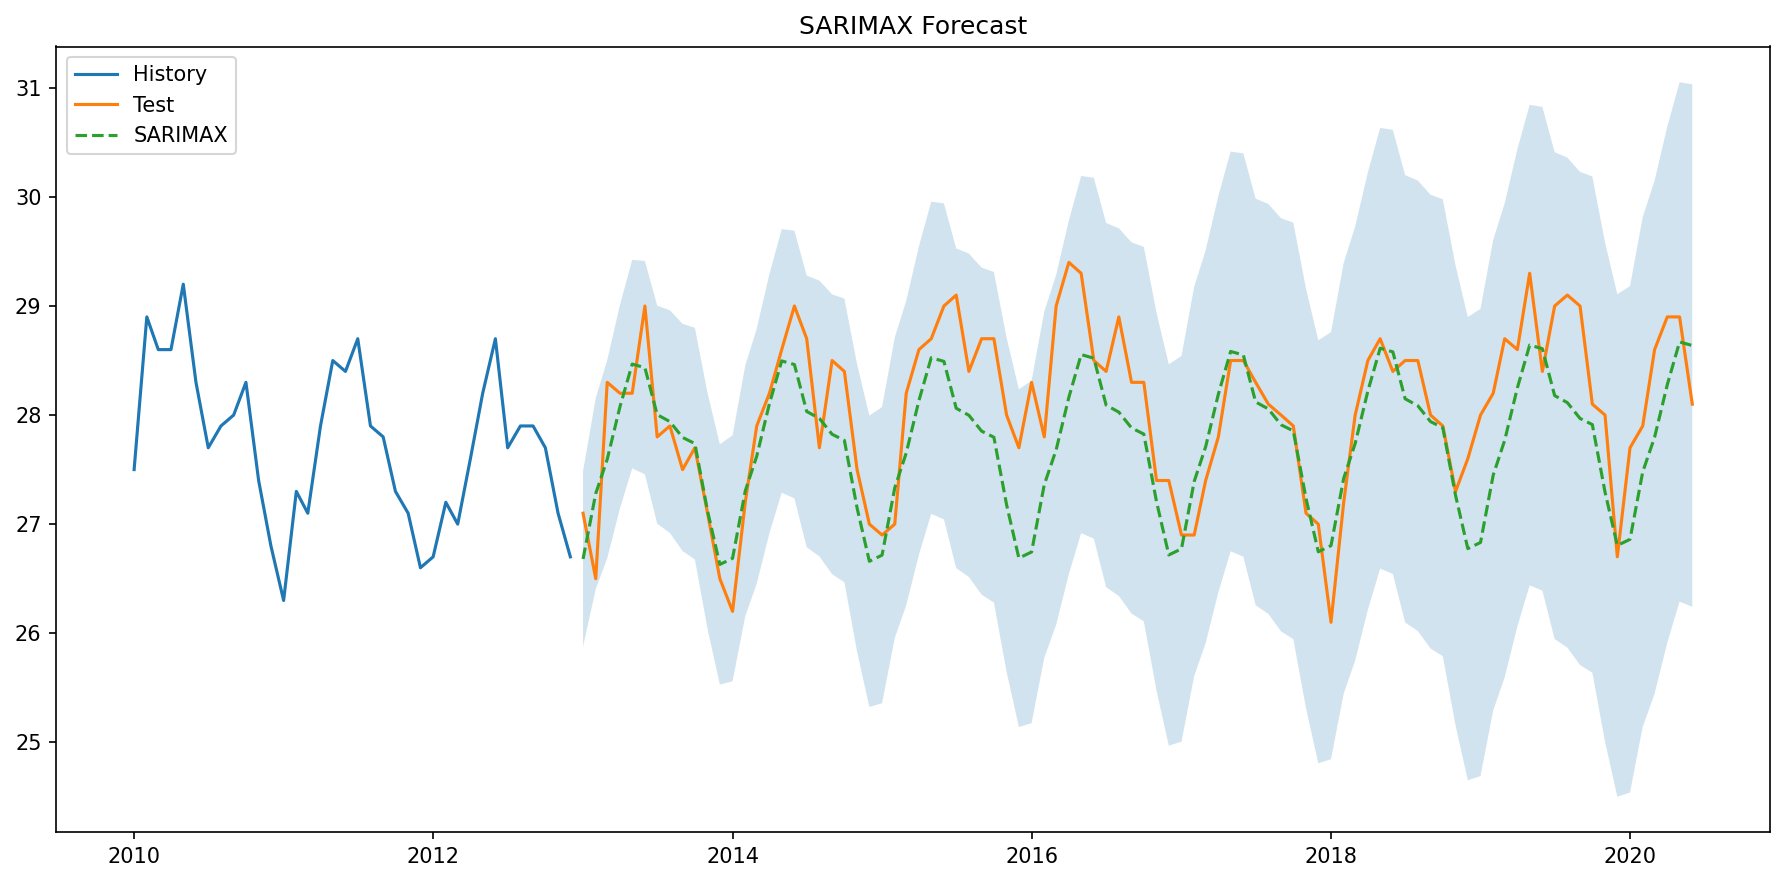

In [18]:
# First, set matplotlib backend to handle potential display issues
import matplotlib
matplotlib.use('Agg')

# Base imports 
import os
import sys
import subprocess
import time
import importlib
import traceback
import matplotlib.pyplot as plt
from IPython.display import Image, display

import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# --- user-requested results directory ---
results_fig_dir = r"E:\AI-Engineering-Capstone-Projects\AirTempTs\PRAICP-1003-AirTempTS\results\figures"
os.makedirs(results_fig_dir, exist_ok=True)

def display_file_if_possible(path):
    """Safely display a file, fallback to print path."""
    print(f"[plot saved] {path}")
    try:
        if 'ipykernel' in sys.modules:
            display(Image(filename=path))
    except Exception as e:
        print("[display failed]", e)

# Configuration
AUTO_INSTALL = True

# Pip commands 
pip_cmds = [
    [sys.executable, "-m", "pip", "install", "--upgrade", "pandas>=2.1"],
    [sys.executable, "-m", "pip", "install", "--upgrade", "torch>=2.1.0", "--index-url", "https://download.pytorch.org/whl/cpu"],
    [sys.executable, "-m", "pip", "install", "neuralprophet"]
]

def run_command(cmd):
    """Run a command safely, return (returncode, stdout)."""
    try:
        print("[RUN] " + " ".join(cmd))
        completed = subprocess.run(cmd, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True)
        print(completed.stdout)
        return completed.returncode, completed.stdout
    except Exception as e:
        print("[RUN ERROR]", e)
        return 1, str(e)

def install_requirements():
    """Install required packages sequentially."""
    for cmd in pip_cmds:
        ret, out = run_command(cmd)
        time.sleep(1)
        if ret != 0:
            print(f"[PIP ERROR] Command failed with return code {ret}")
            return False
    return True

def pandas_has_numpy_extension():
    """Check for required pandas functionality."""
    try:
        import pandas as _pd
        return hasattr(getattr(_pd, "arrays", None), "NumpyExtensionArray")
    except Exception:
        return False

def try_imports_after_installs():
    """Try importing required packages after installation."""
    # Reload pandas
    try:
        if 'pandas' in sys.modules:
            importlib.reload(sys.modules['pandas'])
    except Exception:
        pass

    # Try torch
    try:
        import torch
        tver = getattr(torch, "__version__", "unknown")
        print("[IMPORT] torch version:", tver)
        
        # Check torch version
        try:
            tver_parts = str(tver).split("+")[0].split(".")
            t_ok = tuple(int(x) for x in tver_parts[:2]) >= (2,1)
            if not t_ok:
                print(f"[CHECK] torch {tver} is < 2.1")
                return None
        except Exception:
            print("[CHECK] could not parse torch version")
            return None

    except Exception as e:
        print("[IMPORT ERROR] torch import failed:", e)
        return None

    # Try neuralprophet
    try:
        from neuralprophet import NeuralProphet as NPClass
        print("[IMPORT] neuralprophet imported successfully")
        return NPClass
    except Exception as e:
        print("[IMPORT ERROR] neuralprophet import failed:", e)
        return None

def main():
    """Main execution flow."""
    # Verify data exists
    if 'train_df' not in globals() or 'test_df' not in globals():
        raise RuntimeError("train_df and test_df must be defined before running")

    # Check pandas capability
    np_ext_ok = pandas_has_numpy_extension()
    if not np_ext_ok:
        print("[CHECK] pandas.arrays.NumpyExtensionArray missing")
        if AUTO_INSTALL:
            print("[AUTO_INSTALL] Attempting installations...")
            ok = install_requirements()
            if not ok:
                print("[AUTO_INSTALL] Installation failed")
    elif AUTO_INSTALL:
        print("[AUTO_INSTALL] Running optional upgrades...")
        install_requirements()

    # Import after potential installs
    NeuralProphetClass = try_imports_after_installs()

    # Prepare dataset
    prophet_train = train_df[['ds', 'y']].copy()
    prophet_train['ds'] = pd.to_datetime(prophet_train['ds'])
    prophet_train = prophet_train.sort_values('ds')

    # Try NeuralProphet first
    if NeuralProphetClass is not None:
        try:
            print("[INFO] Setting up NeuralProphet model...")
            model = NeuralProphetClass(
                yearly_seasonality=True,
                weekly_seasonality=False,
                daily_seasonality=False,
                seasonality_mode='multiplicative',
                learning_rate=0.01,
                epochs=100
            )

            print("[INFO] Training model...")
            metrics = model.fit(prophet_train, freq='MS', verbose=False)
            
            future = model.make_future_dataframe(prophet_train, periods=len(test_df))
            forecast = model.predict(future)

            # Find prediction column
            yhat_col = next((c for c in ['yhat1', 'yhat', 'yhat_forecast'] 
                           if c in forecast.columns), None)
            if yhat_col is None:
                raise ValueError("No prediction column found")

            # Extract predictions
            predictions = forecast[yhat_col].values[-len(test_df):]
            rmse = np.sqrt(mean_squared_error(test_df['y'].values, predictions))
            mae = mean_absolute_error(test_df['y'].values, predictions)
            print(f"[METRICS] RMSE: {rmse:.4f}, MAE: {mae:.4f}")

            # Plot results
            try:
                fig = model.plot(forecast)
                fig.savefig(os.path.join(results_fig_dir, "neuralprophet_forecast.png"), 
                           dpi=150, bbox_inches='tight')
                display_file_if_possible(os.path.join(results_fig_dir, "neuralprophet_forecast.png"))
            except Exception:
                print("[WARN] Built-in plot failed, using manual plot")
                plt.figure(figsize=(12,6))
                plt.plot(train_df.index, train_df['y'], label='Train')
                plt.plot(test_df.index, test_df['y'], label='Test')
                plt.plot(test_df.index, predictions, '--', label='Forecast')
                plt.legend()
                plt.title('NeuralProphet Forecast (Manual Plot)')
                plt.tight_layout()
                manual_out = os.path.join(results_fig_dir, "neuralprophet_manual.png")
                plt.savefig(manual_out, dpi=150, bbox_inches='tight')
                plt.close()
                display_file_if_possible(manual_out)

            return rmse, mae, predictions

        except Exception as e:
            print("[ERROR] NeuralProphet failed:", str(e))
            traceback.print_exc()

    # SARIMAX Fallback
    print("[INFO] Attempting SARIMAX fallback...")
    try:
        from statsmodels.tsa.statespace.sarimax import SARIMAX
        
        model = SARIMAX(
            train_df['y'].astype(float),
            order=(1, 1, 1),
            seasonal_order=(1, 1, 1, 12),
            enforce_stationarity=False,
            enforce_invertibility=False
        )
        
        results = model.fit(disp=False)
        forecast = results.get_forecast(steps=len(test_df))
        predictions = forecast.predicted_mean
        conf_int = forecast.conf_int()

        rmse = np.sqrt(mean_squared_error(test_df['y'].values, predictions.values))
        mae = mean_absolute_error(test_df['y'].values, predictions.values)
        print(f"[METRICS] RMSE: {rmse:.4f}, MAE: {mae:.4f}")

        # Plot
        plt.figure(figsize=(12,6))
        plt.plot(train_df['y'].iloc[-36:].index, train_df['y'].iloc[-36:].values, 
                label='History')
        plt.plot(test_df.index, test_df['y'].values, label='Test')
        plt.plot(predictions.index, predictions.values, '--', label='SARIMAX')
        if conf_int is not None:
            plt.fill_between(conf_int.index, conf_int.iloc[:,0], conf_int.iloc[:,1], 
                           alpha=0.2)
        plt.legend()
        plt.title('SARIMAX Forecast')
        plt.tight_layout()
        
        out_path = os.path.join(results_fig_dir, "sarimax_forecast.png")
        plt.savefig(out_path, dpi=150, bbox_inches='tight')
        plt.close()
        display_file_if_possible(out_path)

        return rmse, mae, predictions.values

    except Exception as e:
        print("[ERROR] SARIMAX failed:", str(e))
        traceback.print_exc()
        return None, None, None

if __name__ == "__main__":
    main()